# CARGA DE DATOS

__TODO__

In [1]:
from Utils import DatasetProcess, reconstruction_plot
from AutoEncoder import TwoStepAutoEncoder, TwoStepClassifier, TwoStepTraining, OneStepAutoencoder, OneStepTraining

In [2]:
unlabeled_train, x_train, y_train, x_test, y_test, one_hot_train, one_hot_test = DatasetProcess.alt()

# EJERCICIO 1

Entrena un modelo, creado sobre TensorFlow, haciendo uso únicamente de las instancias etiquetadas de entrenamiento. Dicho modelo debe de tener al menos cuatro capas densas y/o convolucionales.

Responde a las siguientes preguntas:

1. ¿Qué red has escogido? ¿Por qué? ¿Cómo la has entrenado?
2. ¿Cuál es el rendimiento del modelo en entrenamiento? ¿Y en prueba?
3. ¿Qué conclusiones sacas de los resultados detallados en el punto anterior?

# EJERCICIO 2

Entrena el mismo modelo, incorporando las instancias no etiquetadas de entrenamiento mediante la técnica de auto-aprendizaje. Opcionalmente, se ponderará cada instancia de entrada en función de su calidad (o certeza).

Responde a las siguientes preguntas:
1. ¿Qué parámetros has definido para el entrenamiento?
2. ¿Cuál es el rendimiento del modelo en entrenamiento? ¿Y en prueba?
3. ¿Se mejoran los resultados obtenidos en el Ejercicio 1?
4. ¿Qué conclusiones sacas de los resultados detallados en los puntos anteriores?

# EJERCICIO 3

Entrena un modelo de aprendizaje semisupervisado de tipo autoencoder en dos pasos (primero el autoencoder, después el clasificador). La arquitectura del encoder debe ser exactamente la misma que la definida en los Ejercicios 1 y 2, a excepción del último bloque de capas.

Responde a las siguientes preguntas:
1. ¿Cuál es la arquitectura del modelo? ¿Y sus hiperparámetros?
2. ¿Cuál es el rendimiento del modelo en entrenamiento? ¿Y en prueba?
3. ¿Se mejoran los resultados obtenidos en los Ejercicios 1 y 2?
4. ¿Qué conclusiones sacas de los resultados detallados en los puntos anteriores?

In [4]:
autoencoder = TwoStepAutoEncoder(input_shape=unlabeled_train[0].shape,
                                learning_rate=0.0015)
classifier = TwoStepClassifier()

In [5]:
TwoStepTraining(autoencoder=autoencoder, 
                classifier=classifier, 
                x_train=x_train, 
                y_train=one_hot_train, 
                unlabeled_train=unlabeled_train, 
                batch_size_autoencoder=256,
                epochs_autoencoder=5,
                batch_size_classifier=4096,
                epochs_classifier=405)

Epoch 1/5


2025-04-01 11:27:04.116026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


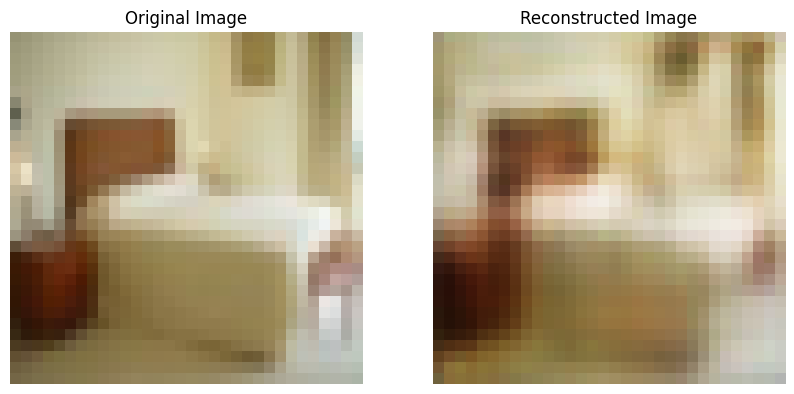

In [10]:
reconstruction_plot(autoencoder, x_test)

# EJERCICIO 4

Entrena un modelo de aprendizaje semisupervisado de tipo autoencoder en un paso (autoencoder y clasificador al mismo tiempo). La arquitectura del autoencoder será la misma que la definida en el Ejercicio 3, y la combinación de encoder y clasificador será igual a la arquitectura definida en el
Ejercicio 1.

Responde a las siguientes preguntas:
1. ¿Cuál es la arquitectura del modelo? ¿Y sus hiperparámetros?
2. ¿Cuál es el rendimiento del modelo en entrenamiento? ¿Y en prueba?
3. ¿Se mejoran los resultados obtenidos en los ejercicios anteriores?
4. ¿Qué conclusiones sacas de los resultados detallados en los puntos anteriores?

In [3]:
one_step_autoencoder = OneStepAutoencoder(input_shape=unlabeled_train[0].shape,
                                learning_rate=0.0015)

/Users/pepe/carrera/3/2/ma2/ma2Python12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-01 12:53:42.569179: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-04-01 12:53:42.569205: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-01 12:53:42.569210: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-01 12:53:42.569224: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-01 12:53:42.569233: I tensorflow/core/common_runtime/pluggable_device/pluggable_devi

In [ ]:
h = OneStepTraining(one_step_autoencoder, 
                    x_train=x_train, 
                    y_train=one_hot_train, 
                    unlabeled_train=unlabeled_train,
                    batch_size=512,
                    epochs=4)

Epoch 1/4


2025-04-01 12:53:46.263868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


71/98 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - classifier_accuracy: 0.0096 - classifier_loss: 0.0575 - decoder_loss: 0.0504 - loss: 0.1079 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


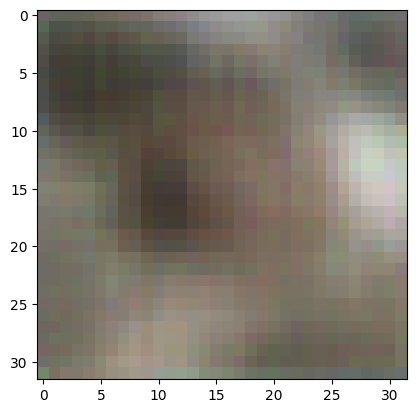

In [14]:
import matplotlib.pyplot as plt
plt.imshow(one_step_autoencoder.predict_proba(x_train[0].reshape(1,32,32,3)).reshape(32,32,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


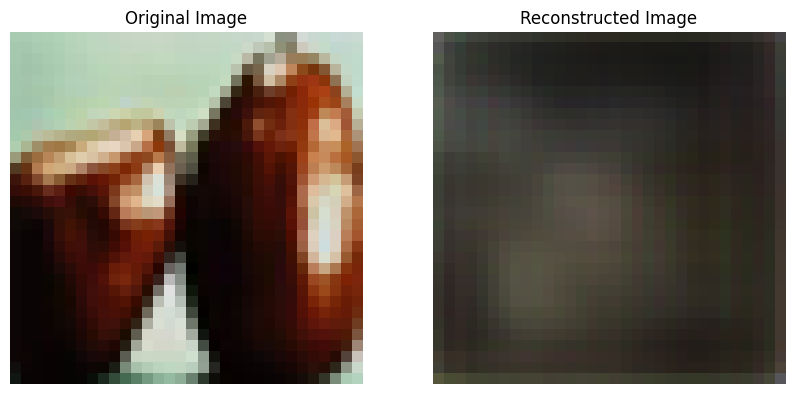

In [30]:
reconstruction_plot(one_step_autoencoder, x_test)

In [28]:
import numpy as np

one_hot_train = np.zeros((y_train.size, len(np.unique(y_train))), dtype=int)
#one_hot_train[np.arange(y_train.size), y_train ] = 1
for vector, y in zip(one_hot_train, y_train):
    vector[y] = 1
one_hot_train[2]
#np.arange(y_train.size)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def reconstruction_plot(autoencoder, x_test):
    index = np.random.randint(len(x_test))
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    axes[0].imshow(x_test[index].reshape(32, 32, 3))
    axes[0].set_title("Original Image")
    axes[0].axis('off') 
    
    # Get the reconstructed image from the autoencoder
    reconstructed_image = autoencoder(x_test[index].reshape(1, 32, 32, 3))

    if  len(reconstructed_image) == 2:
        reconstructed_image = reconstructed_image[1].reshape(32, 32, 3)
    
    # Plot the reconstructed image on the right
    axes[1].imshow(reconstructed_image)
    axes[1].set_title("Reconstructed Image")
    axes[1].axis('off')
    
    # Display the plot
    plt.show()

# EJERCICIO 5

Repite el mismo entrenamiento de los Ejercicios 1-4, pero eliminando las instancias no etiquetadas
más atípicas con respecto a los datos etiquetados. Se cumplirán los siguientes puntos:
- La arquitectura de la red de clasificación en una clase será la misma a la utilizada en el
clasificador del Ejercicio 1, a excepción de la capa de salida.
- Utiliza la técnica explicada en el Notebook 5, usando un valor de 𝑣 = 0,9.

Responde a la siguiente pregunta:
1. ¿Se mejoran los resultados con respecto a los anteriores ejercicios? ¿Qué conclusiones sacas de estos resultados?

In [ ]:
unlabeled_train[0].shape

# EJERCICIO 6

Repite los Ejercicios 3-5 cambiando el autencoder por la técnica definida en el apartado “Hay vida más allá del autoencoder” del Notebook 4. Contesta a las preguntas de dichos ejercicios. Se cumplirán los siguientes puntos:

1. La arquitectura de la red será igual a la parte encoder del autencoder definido en los
ejercicios anteriores.
2. El modelo debe entrenar correctamente.